### K Nearest Neighbors Algorithm

<img src="./picture/KNN.PNG" width="450" heigh = "300" align = "middle">

Example of k-NN classification. The test sample (green circle) should be classified either to the first class of blue squares or to the second class of red triangles. If k = 3 (solid line circle) it is assigned to the second class because there are 2 triangles and only 1 square inside the inner circle. If k = 5 (dashed line circle) it is assigned to the first class (3 squares vs. 2 triangles inside the outer circle).

#### Reference:
#### [A Quick Introduction to K-Nearest Neighbors Algorithm](https://medium.com/@adi.bronshtein/a-quick-introduction-to-k-nearest-neighbors-algorithm-62214cea29c7)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import RadiusNeighborsClassifier
from sklearn import metrics
from sklearn.neighbors import DistanceMetric
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
iris = datasets.load_iris()

In [3]:
df_arr = np.concatenate((iris.data, iris.target.reshape((-1, 1))), axis = 1)
col_names = iris.feature_names.copy()
col_names.append('species')
iris_df = pd.DataFrame(data = df_arr, columns = col_names)
iris_df.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0


In [4]:
map_dic = {num: name for num, name, in zip(range(3), iris.target_names)}
map_dic

{0: 'setosa', 1: 'versicolor', 2: 'virginica'}

In [5]:
def plot_scatter(data, x_axis, y_axis, class_name):
    plt.figure()
    
    sel_data = data[[x_axis, y_axis, class_name]]
    class_num = sel_data[class_name].unique().astype(np.int64)
    for num in class_num:
        x = sel_data[x_axis][sel_data[class_name] == num]
        y = sel_data[y_axis][sel_data[class_name] == num]
        plt.scatter(x = x, y = y, color = ['r', 'g', 'b'][num], label = map_dic[num])

    plt.legend()
    plt.xlabel(x_axis)
    plt.ylabel(y_axis)
    plt.show()

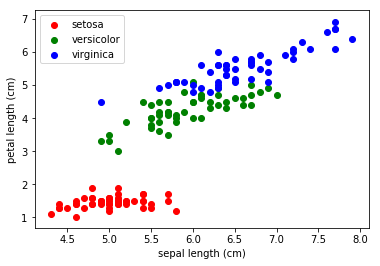

In [6]:
plot_scatter(data = iris_df, x_axis = 'sepal length (cm)', y_axis = 'petal length (cm)', class_name = 'species')

In [7]:
x = iris_df[['sepal length (cm)', 'petal length (cm)']]
y = iris_df['species'].astype(np.int64).values

In [8]:
sc = StandardScaler()
sc.fit(x)
trans_x = sc.fit_transform(x)

In [9]:
x_train, x_test, y_train, y_test = train_test_split(trans_x, y, test_size = 0.2)

### K Nearest Neighbor Algorithm
   1. **Nearest Neighbors**
   2. **Radius Neighbors**
   
### [Nearest Neighbor 參數說明:](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)
 - `n_nighbors`: 選取幾個鄰近點，當作標準
 - `weights`: 設定權重，`uniform`表示不管距離多遠，資料只要在 `n_nighbors`中，資料的權重都一樣，若設定為`distance`，則距離愈遠，權重愈小
 - `algorithm`: 使用什麼演算法，來計算 `n_nighbors`，有`kd_tree`、`ball_tree`和`brute`，若選擇`auto`，則會自動挑選適合資料的演算法
 - `metric`: 使用什麼距離，來判斷兩點之間的距離，default = `"minkowski"`, 詳細其他距離可參考 [sklearn.neighbors.DistanceMetric](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)
 - `p`: `minkowski` distance 中的超參數`p`，when `p=1` equivalent to use `manhattan`distance, and `euclidean`distance for `p=2`.

In [10]:
knn = KNeighborsClassifier(n_neighbors = 5, weights = 'uniform', algorithm = 'auto', metric = 'minkowski', p = 2)
knn.fit(X = x_train, y = y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [11]:
prediction = knn.predict(X = x_test)

In [12]:
print('accuracy: {:.3f}%'.format(knn.score(X = x_test, y = y_test)*100))
print("-"*25)
print(metrics.classification_report(y_true = y_test, y_pred = prediction, target_names = map_dic.values()))
print("-"*25)
print(metrics.confusion_matrix(y_true = y_test, y_pred = prediction))

accuracy: 83.333%
-------------------------
             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00         9
 versicolor       0.88      0.64      0.74        11
  virginica       0.69      0.90      0.78        10

avg / total       0.85      0.83      0.83        30

-------------------------
[[9 0 0]
 [0 7 4]
 [0 1 9]]


### Visualize Decision Boundary

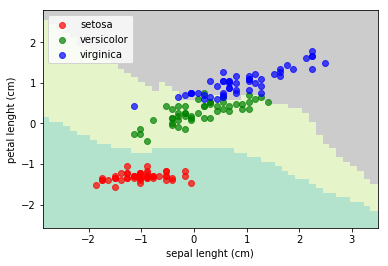

In [13]:
x_min, x_max, y_min, y_max = trans_x[:,0].min(), trans_x[:,0].max(), trans_x[:,1].min(), trans_x[:,1].max()

xx, yy = np.meshgrid(np.linspace(start = x_min - 1, stop = x_max + 1), np.linspace(start = y_min - 1, stop = y_max + 1))

pair_data = np.c_[xx.ravel(), yy.ravel()]

zz = knn.predict(X = pair_data)

zz = zz.reshape(xx.shape)

plt.figure()
plt.pcolormesh(xx, yy, zz, cmap = plt.cm.Pastel2)

for class_num in np.unique(y):
    plot_x = trans_x[y == class_num, 0]
    plot_y = trans_x[y == class_num, 1]
    plt.scatter(x = plot_x, y = plot_y, color = ['r', 'g', 'b'][class_num], label = map_dic[class_num], alpha = 0.7)
    
plt.legend()
plt.xlabel('sepal lenght (cm)')
plt.ylabel('petal lenght (cm)')
plt.show()

### Tune the best `n_nieighbors`

Tuning hyper parameter is an important topic in ML, we will discuss in `traing technique` session.

In this part, we just simplily demonstrate how to tune `n_neighbors`.

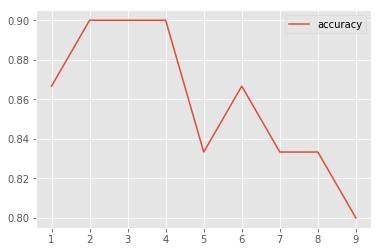

In [14]:
n_parameter = np.arange(1, 10)
acc = list()
for n in n_parameter:
    knn = KNeighborsClassifier(n_neighbors = n, weights = 'uniform', algorithm = 'auto', metric = 'minkowski', p = 2)
    knn.fit(X = x_train, y = y_train)
    acc.append(knn.score(X = x_test, y = y_test))

plt.style.use('ggplot')
plt.plot(n_parameter, acc, label = 'accuracy')
plt.legend()
plt.show()

### [Radius Neighbor 參數說明 :](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.RadiusNeighborsClassifier.html)

 - `radius`: 根據多少距離內的樣本，來決定類別
 - `weights`: 設定權重，`uniform`表示不管距離多遠，資料只要在 `radius`中，資料的權重都一樣，若設定為`distance`，則距離愈遠，權重愈小
 - `algorithm`: 使用什麼演算法，來計算 neast neighbors，有`kd_tree`、`ball_tree`和`brute`，若選擇`auto`，則會自動挑選適合資料的演算法
 - `metric`: 使用什麼距離，來判斷兩點之間的距離，default = `"minkowski"`, 詳細其他距離可參考 [sklearn.neighbors.DistanceMetric](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)
 - `p`: `minkowski` distance 中的超參數`p`，when `p=1` equivalent to use `manhattan`distance, and `euclidean`distance for `p=2`.


In [15]:
rnclf = RadiusNeighborsClassifier(radius = 0.5, weights = "uniform", algorithm = "auto", metric = "minkowski", p = 2)
rnclf.fit(X = x_train, y = y_train)

RadiusNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
             metric_params=None, outlier_label=None, p=2, radius=0.5,
             weights='uniform')

In [16]:
prediction = rnclf.predict(X = x_test)

print('accuracy: {:.3f}%'.format(rnclf.score(X = x_test, y = y_test)*100))
print("-"*25)
print(metrics.classification_report(y_true = y_test, y_pred = prediction, target_names = map_dic.values()))
print("-"*25)
print(metrics.confusion_matrix(y_true = y_test, y_pred = prediction))

accuracy: 83.333%
-------------------------
             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00         9
 versicolor       0.88      0.64      0.74        11
  virginica       0.69      0.90      0.78        10

avg / total       0.85      0.83      0.83        30

-------------------------
[[9 0 0]
 [0 7 4]
 [0 1 9]]


### K Nearest Neighbors Regressor

#### KNN algorithm also can apply on regression problems.

  - [KNeighborsRegressor參數說明:](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html)
    - the same as `KNeighborsClassifier`
  

In [17]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import RadiusNeighborsRegressor

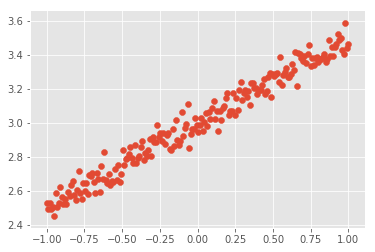

In [18]:
# generate data
plt.style.use(style = 'ggplot')
x = np.linspace(start = -1, stop = 1, num = 200)
np.random.shuffle(x)

y = 0.5*x + 3 + np.random.normal(loc = 0, scale = 0.05, size = (x.shape[0]))
x = x.reshape(-1, 1)
plt.scatter(x, y)
plt.show()

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [20]:
knreg = KNeighborsRegressor(n_neighbors = 5, weights = 'uniform', algorithm = 'auto', p = 2, metric = 'minkowski')
knreg.fit(X = x_train, y = y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='uniform')

In [21]:
prediction = knreg.predict(X = x_test)
print("R square: {:.2f}".format(knreg.score(X = x_test, y = y_test)))
print("Mean Square Error: {:.3f}".format(np.mean((prediction - y_test)**2)))

R square: 0.96
Mean Square Error: 0.003


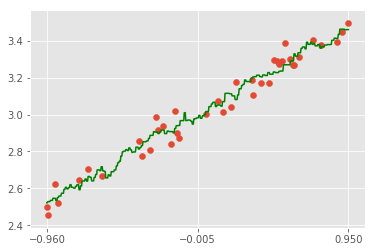

In [22]:
plt.figure()

temp_x = np.linspace(start = x_test.min(), stop = x_test.max(), num = 600).reshape(-1, 1)
plt.scatter(x = x_test, y = y_test)
plt.plot(temp_x, knreg.predict(temp_x), color = 'g', linestyle= '-')
plt.xticks(np.linspace(start = x_test.min(), stop = x_test.max(), num = 3))
plt.show()

### RadiusNeighborsRegresor

### [參數說明:](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.RadiusNeighborsRegressor.html)
   - The same as `RadiusNeighborsClassifier`

In [23]:
radreg = RadiusNeighborsRegressor(radius = 0.05, weights = 'uniform', algorithm = 'auto', p = 2, metric = 'minkowski')
radreg.fit(X = x_train, y = y_train)

RadiusNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
             metric_params=None, p=2, radius=0.05, weights='uniform')

In [24]:
prediction = radreg.predict(X = x_test)
print("R square: {:.2f}".format(radreg.score(X = x_test, y = y_test)))
print("Mean Square Error: {:.3f}".format(np.mean((prediction - y_test)**2)))

R square: 0.97
Mean Square Error: 0.003


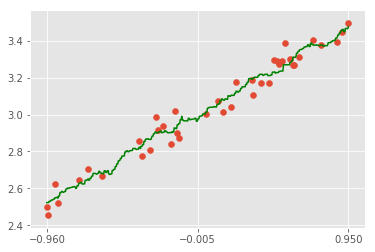

In [25]:
plt.figure()

temp_x = np.linspace(start = x_test.min(), stop = x_test.max(), num = 600).reshape(-1, 1)
plt.scatter(x = x_test, y = y_test)
plt.plot(temp_x, radreg.predict(temp_x), color = 'g', linestyle= '-')
plt.xticks(np.linspace(start = x_test.min(), stop = x_test.max(), num = 3))
plt.show()

### sklearn.neighbors.DistanceMetric

 - **歐式距離(Euclidean Distance)**
    
    $a = (x_1, y_1)$, $ \ b = (x_2, y_2)$
    
    $d_{12}=\sqrt{(x_{1}-x_{2})^2 + (y_{1} - y_{2})^2}$
    
    **If a and b have n dimension**
    
    $a = (x_{11}, x_{12}, x_{13}, ....., x_{1n})$, $ \ b = (x_{21}, x_{22}, x_{23}, ....., x_{2n})$
    
    $d_{ab}=\sqrt{\sum_{k = 1}^{n}(x_{1k} - x_{2k})^2} = \sqrt{(a - b)^{T}(a - b)}$

In [26]:
a = np.array([0, 0]).reshape(1, 2)
b = np.array([4, 3]).reshape(1, 2)
two_point = np.concatenate((a, b), axis = 0)

dist = DistanceMetric.get_metric('euclidean')
dist_matrix = dist.pairwise(two_point) # return distance matrix
distance = np.around(dist_matrix[1, 0], decimals = 3)
print(dist_matrix)

def euclidean_distance(a, b):
    return np.sqrt(((a - b)**2).sum())

print("distance:{: .2f}".format(euclidean_distance(a, b)))

[[0. 5.]
 [5. 0.]]
distance: 5.00


In [27]:
def plot_euclidean_distance(a, b):
    
    a = np.array(a).reshape(1, 2)
    b = np.array(b).reshape(1, 2)
    
    two_point = np.concatenate((a, b), axis = 0)

    dist = DistanceMetric.get_metric('euclidean')
    dist_matrix = dist.pairwise(two_point) # return distance matrix
    distance = np.around(dist_matrix[1, 0], decimals = 3)
    
    midpoint = (a + b)/2
    x_dist = np.abs(a[:, 0] - b[:, 0]) # calculate x-axis distance between two points 
    y_dist = np.abs(a[:, 1] - b[:, 1]) # calculate y-axis distance between two points

    x_axis = (a[:, 0] + b[:, 0])/2 # calculate midpoint coordinate of x-axis between two points 
    y_axis = (a[:, 1] + b[:, 1])/2 # calculate midpoint coordinate of y-axis between two points 

    plt.figure(figsize = (3, 3))
    plt.plot(two_point[:, 0], two_point[:, 1], 'bo')
    plt.plot(two_point[:, 0], two_point[:, 1], 'g--')

    x_vertical = np.where(a[:, 1] > b[:, 1], a[:, 0], b[:, 0])
    y_horizontal = np.where(a[:, 1] < b[:, 1], a[:, 1], b[:, 1])

    plt.hlines(y = y_horizontal, xmin = two_point[:, 0].min(), xmax = two_point[:, 0].max(), color = 'r', linestyles = '--')
    plt.vlines(x = x_vertical, ymin = two_point[:, 1].min(), ymax = two_point[:, 1].max(), color = 'orange', linestyles = '--')

    plt.text(x = midpoint[:, 0], y = midpoint[:, 1] + 0.05, s = 'd = ' + str(distance))
    plt.text(x = x_axis, y = y_horizontal, s = x_dist[0]) # adding text on the y-horizontal line
    plt.text(x = x_vertical, y = y_axis, s = y_dist[0]) # adding text on the x-vertical line

    #plt.xticks(np.arange(start = two_point[:, 0].min() - 1, stop = two_point[:, 0].max() + 2))
    #plt.yticks(np.arange(start = two_point[:, 1].min() - 1, stop = two_point[:, 1].max() + 2))
    plt.show()

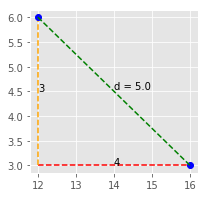

In [28]:
plot_euclidean_distance(a = [12, 6], b = [16, 3])

 - **曼哈頓距離(Manhattan Distance)**
 
   $a = (x_1, y_1)$, $ \ b = (x_2, y_2)$
   
   $d_{12} =\ \mid x_{1} - x_{2}\mid + \mid y_{1} - y_{2}\mid$
   
   **If a and b have n dimension**
    
   $a = (x_{11}, x_{12}, x_{13}, ....., x_{1n})$, $ \ b = (x_{21}, x_{22}, x_{23}, ....., x_{2n})$
    
   $d_{ab}=\sum_{k = 1}^{n}\mid x_{1k} - x_{2k}\mid$

In [29]:
a = np.array([0, 0]).reshape(1, 2)
b = np.array([4, 3]).reshape(1, 2)
two_point = np.concatenate((a, b), axis = 0)

dist = DistanceMetric.get_metric('manhattan')
dist_matrix = dist.pairwise(two_point) # return distance matrix
print(dist_matrix)

[[0. 7.]
 [7. 0.]]


In [30]:
def manhattan_distance(a, b):
    return np.abs(a[:, 0] - b[:, 0]) + np.abs(a[:, 1] - b[:, 1])

manhattan_distance(a, b)[0]

7

 - **柴比雪夫距離(Chebyshev Distance)**
 
   $a = (x_1, y_1)$, $ \ b = (x_2, y_2)$
   
   $d_{12} =\ max(\mid x_{1} - x_{2}\mid, \ \mid y_{1} - y_{2}\mid)$
   
    **If a and b have n dimension**
    
   $a = (x_{11}, x_{12}, x_{13}, ....., x_{1n})$, $ \ b = (x_{21}, x_{22}, x_{23}, ....., x_{2n})$
    
   $d_{ab}= max(\mid x_{1k} - x_{2k}\mid)$

In [31]:
a = np.array([0, 0]).reshape(1, 2)
b = np.array([4, 3]).reshape(1, 2)
two_point = np.concatenate((a, b), axis = 0)

dist = DistanceMetric.get_metric('chebyshev')
dist_matrix = dist.pairwise(two_point)
print(dist_matrix)

[[0. 4.]
 [4. 0.]]


In [32]:
def chebyshev_distance(a, b):
    if len(a) != len(b) :
        raise ValueError
    else:
        return np.max(np.abs(a - b))

In [33]:
chebyshev_distance(a, b)

4

- **閔可夫斯基(Minkowski Distance)**
  - The Minkowski distance is a metric in a normed vector space which can be considered as a generalization of both the Euclidean distance and the Manhattan distance.[wikipedia](https://en.wikipedia.org/wiki/Minkowski_distance)
 
   **If a and b have n dimension**
    
   $a = (x_{11}, x_{12}, x_{13}, ....., x_{1n})$, $ \ b = (x_{21}, x_{22}, x_{23}, ....., x_{2n})$
    
   $d_{12} = \sqrt[p]{\sum_{k = 1}^{n}\mid x_{1k} - x_{2k} \mid^p }$
   
     - when $p = 1$, equivalent to use manhattan distance.
   
     - when $p = 2$, equivalent to use euclidean distance.
   
     - when $p \to \infty$, equivalent to use chebyshev distance.

In [34]:
a = np.array([0, 0]).reshape(1, 2)
b = np.array([4, 3]).reshape(1, 2)
two_point = np.concatenate((a, b), axis = 0)

dist = DistanceMetric.get_metric('minkowski', p = 1)
dist_matrix = dist.pairwise(two_point)
print('manhattan distance: \n', dist_matrix)

dist = DistanceMetric.get_metric('minkowski', p = 2)
dist_matrix = dist.pairwise(two_point)
print("euclidean distance : \n", dist_matrix)

dist = DistanceMetric.get_metric('minkowski', p = float("Inf")) ## float("Inf") denote infinite
dist_matrix = dist.pairwise(two_point)
print("chebyshev distance : \n", dist_matrix)

manhattan distance: 
 [[0. 7.]
 [7. 0.]]
euclidean distance : 
 [[0. 5.]
 [5. 0.]]
chebyshev distance : 
 [[0. 4.]
 [4. 0.]]
